### Importing the necessary libraries

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from tqdm import tqdm
from sklearn.metrics.pairwise import euclidean_distances
import random
from sklearn.metrics import accuracy_score
from random import seed

### Creating the artifical data

In [3]:
x,y=make_classification(n_samples=10000, n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,
                        weights=None,flip_y=0.01, class_sep=1.0, random_state=60)

### Dividing the data into train and test

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=42)

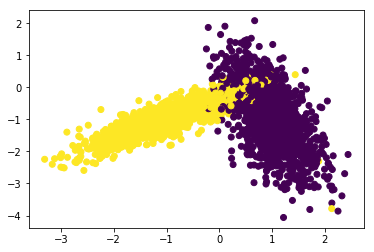

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
colors={0:'red',1:'blue'}
plt.scatter(x_test[:,0], x_test[:,1],c=y_test)
plt.show()

### Implementing Custom RandomSearchCV

In [7]:
#https://stackoverflow.com/questions/61818704/building-a-custom-randomsearchcv-using-python

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

def RandomSearchCV(x_train,y_train, classifier, folds):
    trainscores = []
    testscores = []

    #1. Generating 10 unique values from given range
    global params
    params = sorted(random.sample(range(1, 30), 10),reverse=False)
    x_train_split = []
    y_train_split = []
    #dividing x_train into groups
    for i in range(0, len(x_train), int(len(x_train)/folds)):
        x_train_split.append(x_train[i:i+int(len(x_train)/folds)])
        y_train_split.append(y_train[i:i+int(len(y_train)/folds)])

    #3.for each hyperparameter that we generated in step 1 and dividing dataset into training and CV datasets:

    for parameter in tqdm(params):
        trainscores_folds = []
        testscores_folds  = []
        
        for group in range(len(x_train_split)):
            x_train_group = np.concatenate(x_train_split[0:group] + x_train_split[group+1:])
            x_cv_group = x_train_split[group]
            y_train_group = np.concatenate(y_train_split[0:group] + y_train_split[group+1:])
            y_cv_group = y_train_split[group]

            #classifier (K-NN)
            classifier.n_neighbors = parameter
            classifier.fit(x_train_group, y_train_group)

            #Predicton
            y_pred = classifier.predict(x_cv_group)
            testscores_folds.append(accuracy_score(y_cv_group, y_pred))

            y_pred = classifier.predict(x_train_group)
            trainscores_folds.append(accuracy_score(y_train_group, y_pred))

        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
        
    return trainscores, testscores

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.55it/s]


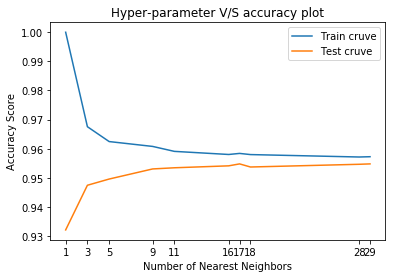

[1, 3, 5, 9, 11, 16, 17, 18, 28, 29]


In [9]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

neigh = KNeighborsClassifier()
trainscores,testscores = RandomSearchCV(x_train,y_train, neigh, folds = 5) # calling the function
plt.plot(params,trainscores, label='Train cruve')
plt.plot(params,testscores, label='Test cruve')
plt.title('Hyper-parameter V/S accuracy plot')
plt.legend()
plt.xticks(params)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Accuracy Score')
plt.show()
print(params)

 **k=17 is the best hyper parameter**

### Decision boundary

In [10]:
#https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy

def plot_decision_boundary(X1, X2, y, clf):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    #https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy
    #https://numpy.org/doc/stable/reference/generated/numpy.arange.html
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

### Drawing decision boundry for optimal k

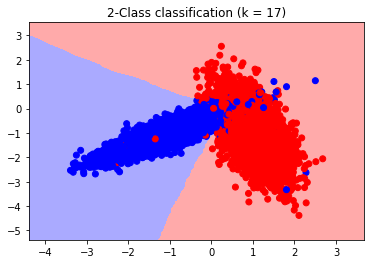

In [11]:
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)
        
neigh = KNeighborsClassifier(n_neighbors = 17)
neigh.fit(x_train, y_train)
plot_decision_boundary(x_train[:, 0], x_train[:, 1], y_train, neigh)